In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [24]:
os.chdir('C:\\Users\\kirti\\Downloads')

In [25]:
MR=pd.read_csv('Market+Risk+Dataset.csv')

In [26]:
MR.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing column names (containing spaces)

In [27]:
MR.columns = MR.columns.str.replace(' ', '_')

In [28]:
MR.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [29]:
print('The number of rows (observations) is',MR.shape[0],'\n''The number of columns (variables) is',MR.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [30]:
MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Descriptive Statistics for the Continuous Variables

#### Plot to see price trend over time for Different Companies

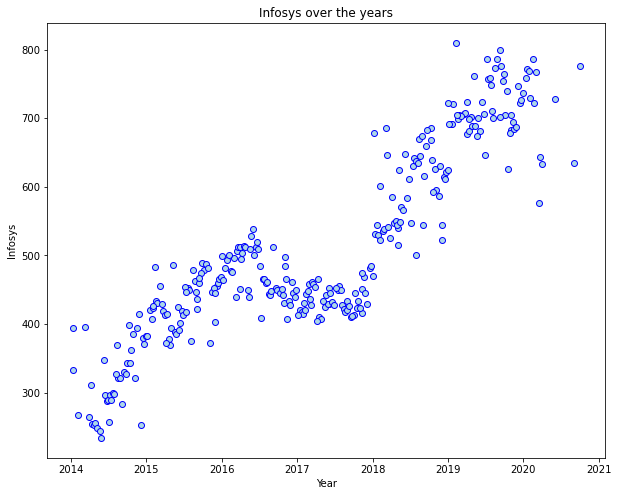

In [31]:
plt.figure(figsize = (10, 8))
MR['dates'] = [pd.to_datetime(d) for d in MR['Date']]
plt.scatter(MR['dates'], MR['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

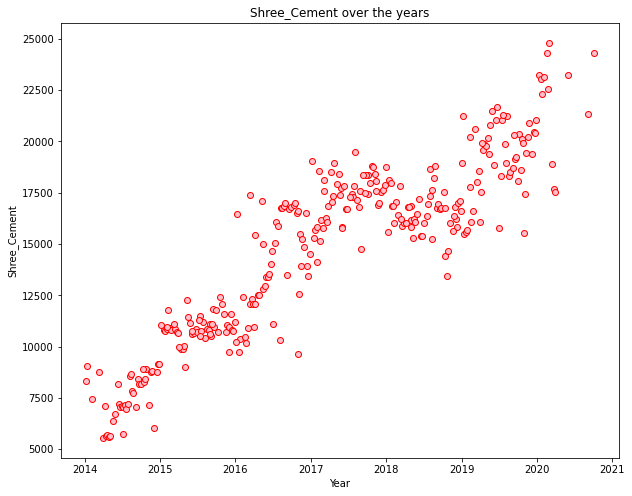

In [32]:
plt.figure(figsize = (10, 8))
MR['dates'] = [pd.to_datetime(d) for d in MR['Date']]
plt.scatter(MR['dates'], MR['Shree_Cement'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree_Cement over the years')
plt.show()

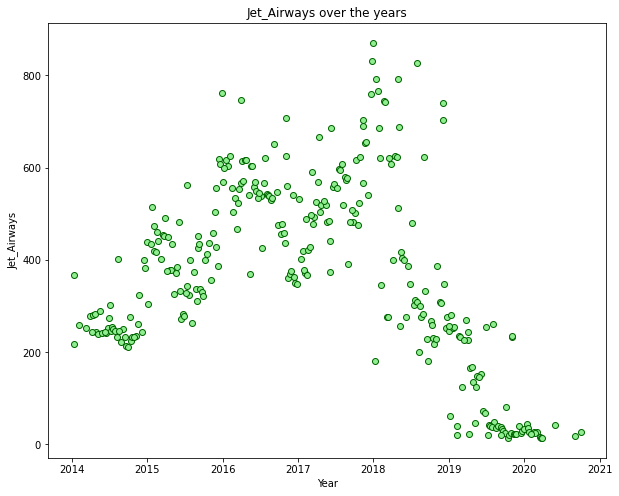

In [33]:
plt.figure(figsize = (10, 8))
MR['dates'] = [pd.to_datetime(d) for d in MR['Date']]
plt.scatter(MR['dates'], MR['Jet_Airways'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Jet_Airways over the years')

plt.show()

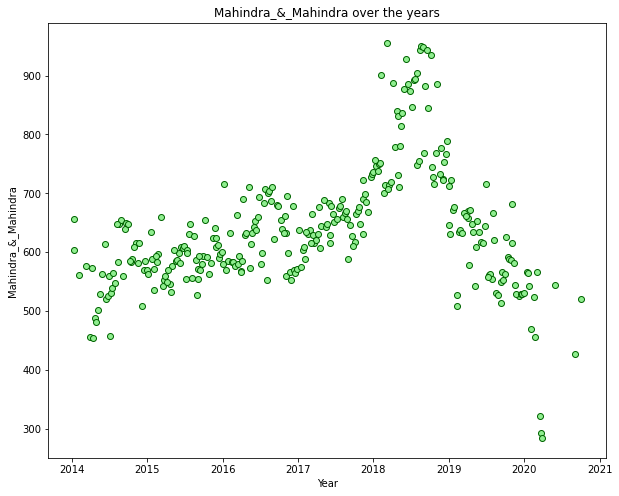

In [34]:
plt.figure(figsize = (10, 8))
MR['dates'] = [pd.to_datetime(d) for d in MR['Date']]
plt.scatter(MR['dates'], MR['Mahindra_&_Mahindra'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Mahindra_&_Mahindra over the years')

plt.show()

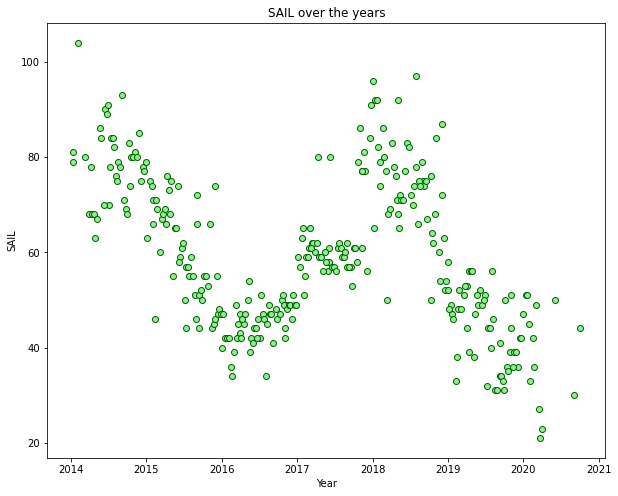

In [35]:
plt.figure(figsize = (10, 8))
MR['dates'] = [pd.to_datetime(d) for d in MR['Date']]
plt.scatter(MR['dates'], MR['SAIL'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')

plt.show()

#### Analyzing returns

In [36]:
stock_returns = np.log(MR.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [37]:
stock_returns.shape

(314, 10)

In [38]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


### Means and Standard Deviation for all stocks

#### Calculating Stock Means

In [39]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

#### Calculating Stock Standard Deviation

In [40]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [41]:
mr = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
mr

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


#### Plot of Stock Means vs Standard Deviation 

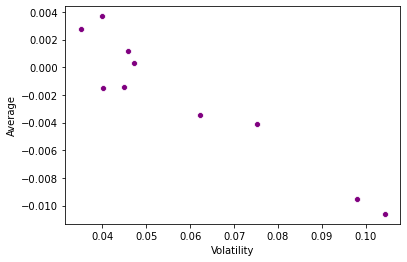

In [45]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(mr['Volatility'], mr['Average'], edgecolors = 'black', color='purple')
plt.show()